# Training Strategy 5: Time Series Split (Sliding/Rolling Window Spilt)

Motivation: Prevent leaking of future data into training data. 
Approach: Always predict into the future.  Test set is always in the future. 


https://medium.com/@mouadenna/time-series-splitting-techniques-ensuring-accurate-model-validation-5a3146db3088

In [2]:
import pandas as pd
weather_df = pd.read_csv('/Users/sheikharfahmi/Desktop/TIL_Python_Programming/SAIL2025---Group20/data/weather_data_cleaned.csv')
crowd_df = pd.read_csv('/Users/sheikharfahmi/Desktop/TIL_Python_Programming/SAIL2025---Group20/data/sensor_data.csv')
crowd_df['timestamp'] = pd.to_datetime(crowd_df['timestamp'], utc=False)
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'], utc=False)
weather_df = weather_df.rename(columns={'datetime': 'timestamp'})
weather_df['timestamp'] = weather_df['timestamp'].dt.tz_localize(None)
crowd_df['timestamp'] = crowd_df['timestamp'].dt.tz_localize(None)

merged_df = pd.merge_asof(
    crowd_df,
    weather_df,
    on = 'timestamp',
    direction = 'nearest',
    tolerance = pd.Timedelta('60min')
)

merged_df.set_index('timestamp')
merged_df.head()
sensor_cols = merged_df.columns[1:-14]
feature_cols = merged_df.columns[-14:]

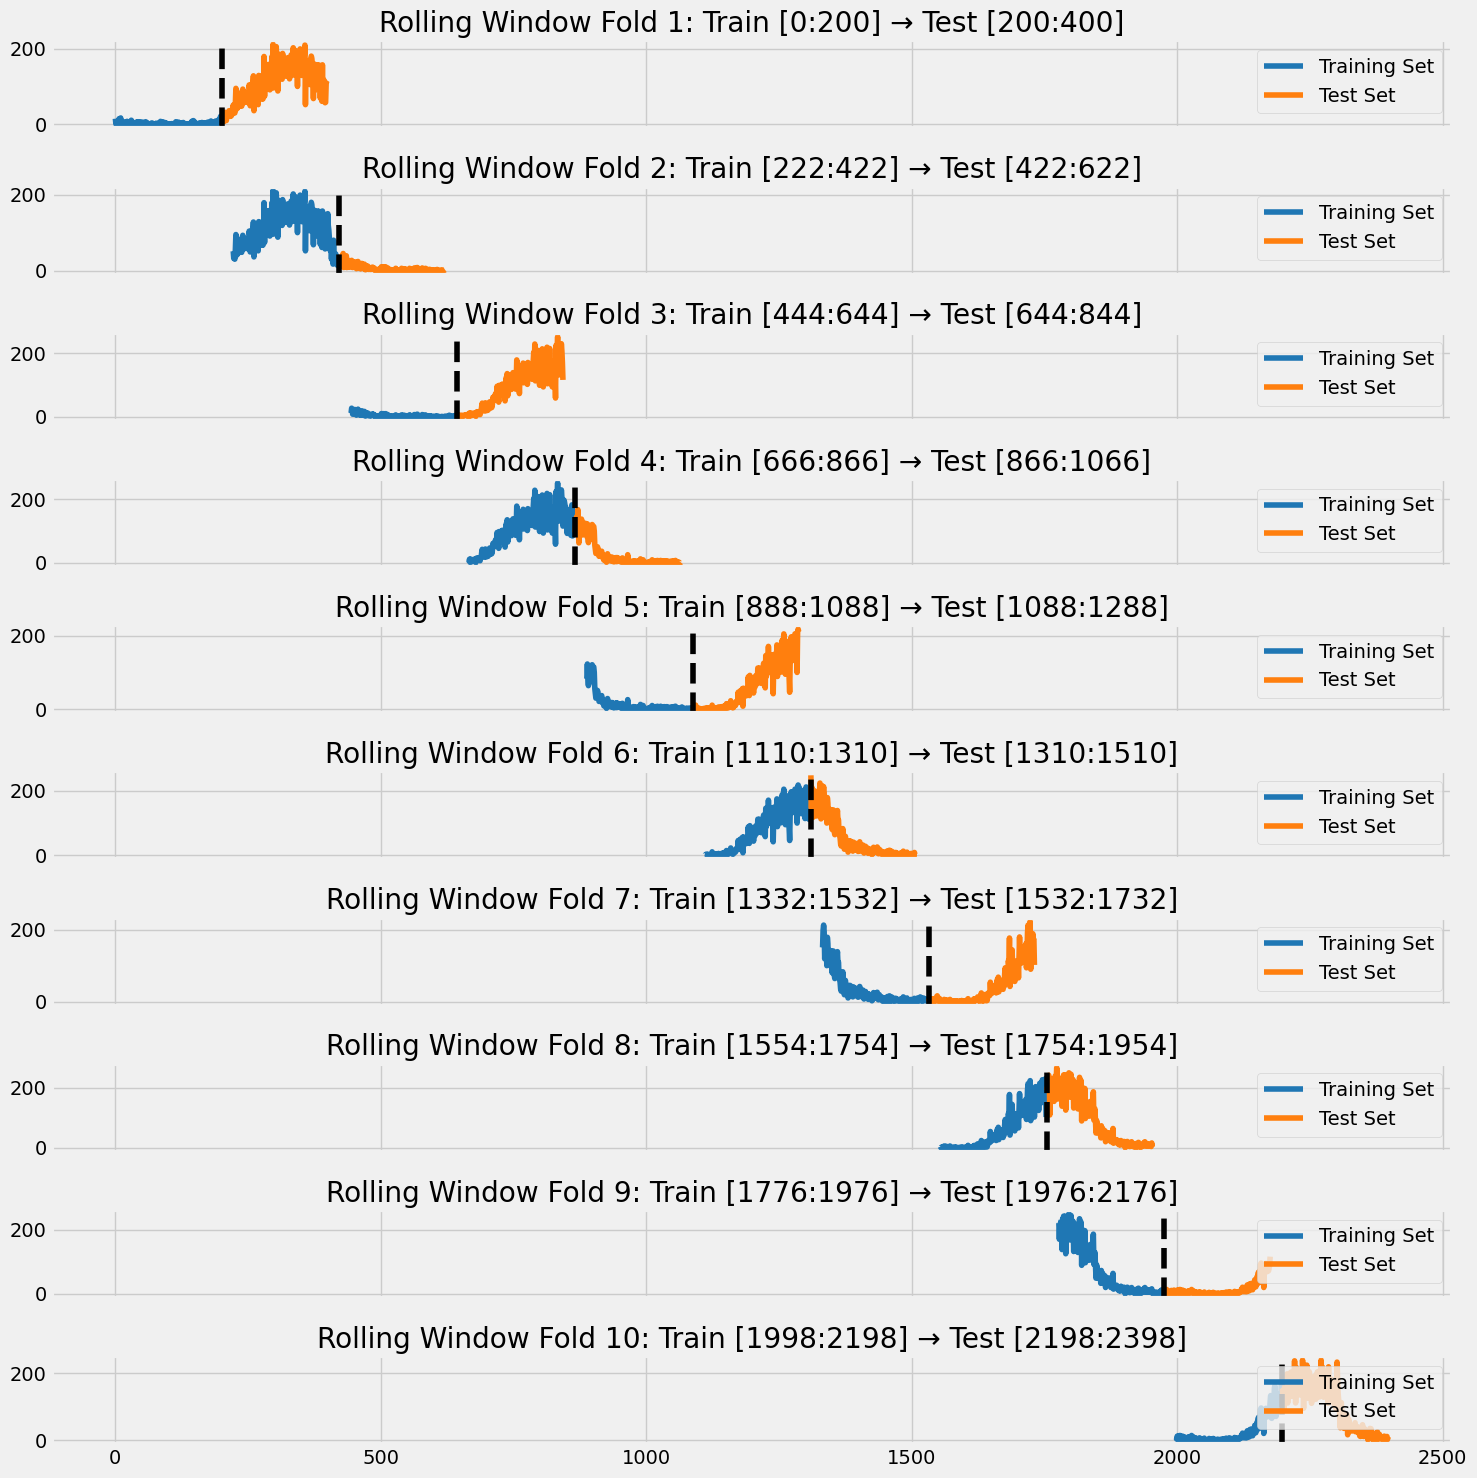

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

# --- CONFIG ---
window_size = 200     # training window length
test_size = 200        # test window length
n_splits = 10          # how many folds to show

# Generate rolling splits manually
total_points = len(merged_df)
max_start = total_points - (window_size + test_size)
step = max_start // (n_splits - 1)

fig, ax = plt.subplots(n_splits, 1, figsize=(15, 15), sharex=True)

for fold, start in enumerate(range(0, max_start, step)):
    train_start = start
    train_end = start + window_size
    test_start = train_end
    test_end = train_end + test_size

    train = merged_df.iloc[train_start:train_end]
    test = merged_df.iloc[test_start:test_end]

    # Plot rolling window data
    ax[fold].plot(train.index, train['CMSA-GAKH-01_0'], label='Training Set', color='tab:blue')
    ax[fold].plot(test.index, test['CMSA-GAKH-01_0'], label='Test Set', color='tab:orange')

    ax[fold].axvline(test.index.min(), color='black', linestyle='--')
    ax[fold].set_title(f"Rolling Window Fold {fold+1}: Train [{train_start}:{train_end}] → Test [{test_start}:{test_end}]")
    ax[fold].legend(loc='upper right')

plt.tight_layout()
plt.show()
